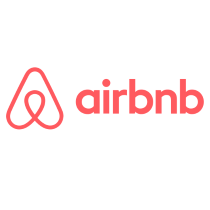

# Exploratory Data Analysis and Geospatial Visualization of the NYC Airbnb Data from 2019

## Tasks:
### Import the data
### Data Wrangling (Cleaning)
### Statisical Analysis
### Visualization
### Optional: Sqlite3, Machine Learning

In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# 2019 AirBnB Data

In [ ]:
data = pd.read_csv('/content/AB_NYC_2019.csv') #check

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#viewing columns and rows
data.shape

(48895, 16)

In [ ]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#Descriptive statistics for numerical values
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Dropping columns that are unnecessary for our analysis
data.drop('id', axis = 1, inplace= True)
data.drop('host_name', axis = 1, inplace = True) #in case, you need primary key, delete.
data.drop('calculated_host_listings_count', axis=1, inplace=True)
data.drop('last_review', axis = 1, inplace =True)

#Renaming columns
data = data.rename(columns={'neighbourhood_group': 'borough',
                            'neighbourhood': 'neighborhood',
                            'listing_price': 'price'})
data.columns

Index(['name', 'host_id', 'borough', 'neighborhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365'],
      dtype='object')

In [ ]:
#checking for duplicated values
print(np.sum(data.duplicated()), 'values are duplicated.')

0 values are duplicated.


#Handling Missing Values

In [ ]:
#counting null values for each value
missing_values_count = np.sum(data.isnull())
missing_values_count #check

name                    16
host_id                  0
borough                  0
neighborhood             0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
reviews_per_month    10052
availability_365         0
dtype: int64

In [ ]:
total_cells = np.product(data.shape)
total_missing =  missing_values_count.sum()

#calculating the percentage of missing values
percentage_missing = np.round((total_missing / total_cells) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing) #check

Percentage of missing values in the dataset: 1.72


In [ ]:
#Imputation of missing values with median values
data['reviews_per_month'] = data.reviews_per_month.fillna(data.reviews_per_month.median()) #check

In [ ]:
#Dropping null values and counting the dropped rows
cleaned_df = data.dropna(axis = 0, how ='any') #Dropping Rows with at least 1 null value
print(len(data) - len(cleaned_df ), 'rows were dropped with missing values.') #check

16 rows were dropped with missing values.


In [ ]:
np.sum(cleaned_df.isnull()) #check

name                 0
host_id              0
borough              0
neighborhood         0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

In [ ]:
#Excluding prices that are equal to zero
df = cleaned_df[cleaned_df['price'] != 0]

In [ ]:
df.head()

,name,host_id,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ed5d58110>,
      dtype=object)

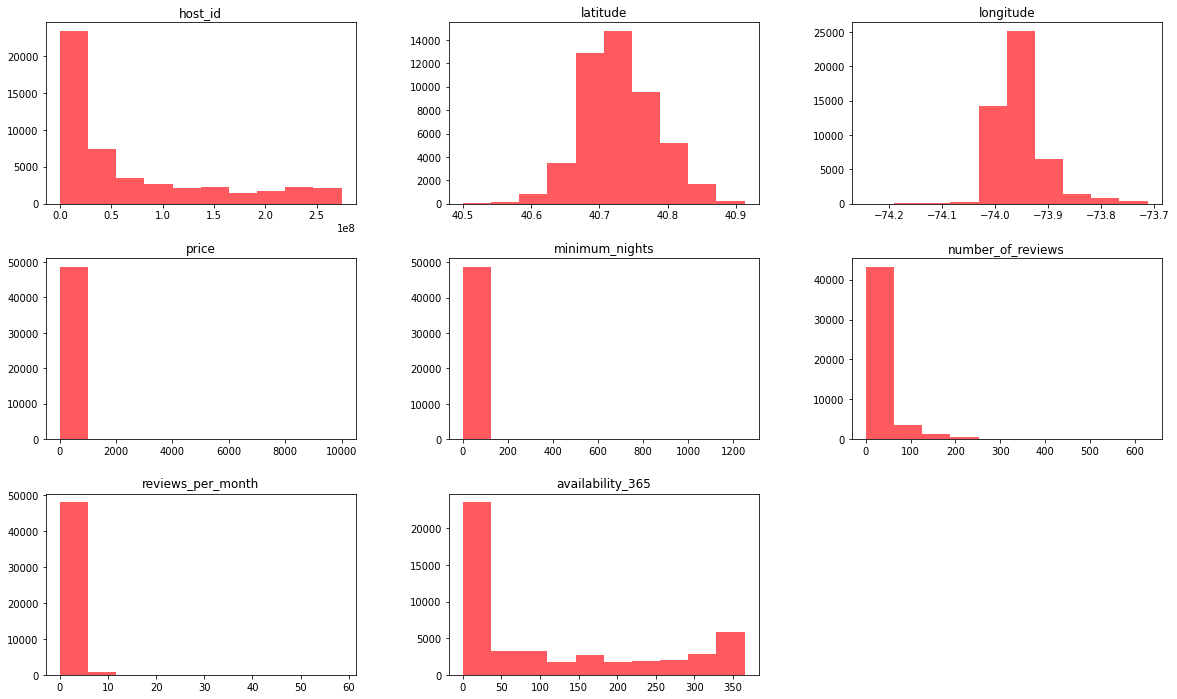

In [ ]:
#Viewing distribution of numeric data
#univariate analysis for numerical data
df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

## Handling outliers

In [ ]:
# calculate interquartile range
q25, q75 = np.percentile(cleaned_df.price, 25), np.percentile(cleaned_df.price, 75)
iqr = q75 - q25

In [ ]:
#calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=69.000, 75th=175.000, IQR=106.000


In [ ]:
# identify outliers
outliers = [x for x in cleaned_df.price if x < lower or x > upper]
print('Outliers observations:',len(outliers))

Outliers observations: 2971


In [ ]:
# remove outliers
non_outliers = [x for x in cleaned_df.price if x >= lower and x <= upper]
print('Non-outlier observations:',len(outliers_removed))

NameError: ignored

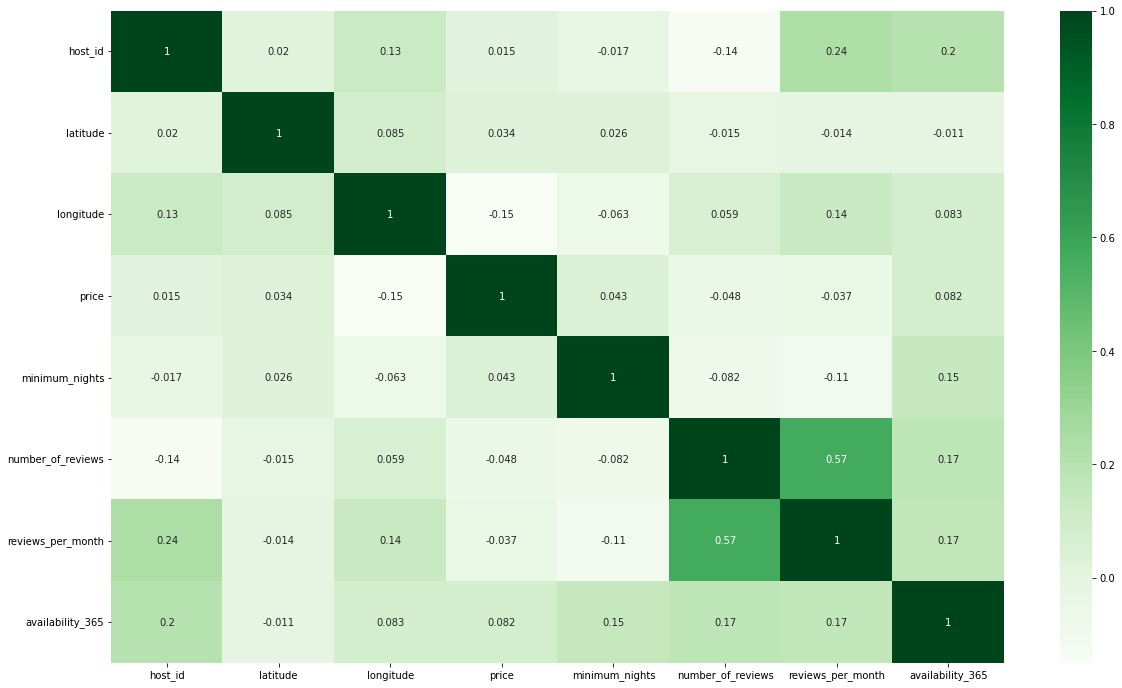

In [ ]:
#Vewing correlation of the numerical values

plt.figure(figsize=(20,12))


abnb_corr = df.corr()
sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Greens")

## Univariate Analysis

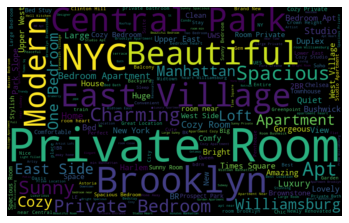

In [ ]:
#Univariate analysis
from wordcloud import WordCloud

text = ' '.join([text for text in df['name']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)



plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

## Bivariate analysis: Cross tabulation

In [ ]:
#Median Listing Price by borough
median_listing_price = df.groupby('borough')['price'].agg('median').sort_values(ascending = False)
np.round(median_listing_price, 2)

borough
Manhattan        150
Brooklyn          90
Staten Island     75
Queens            75
Bronx             65
Name: price, dtype: int64

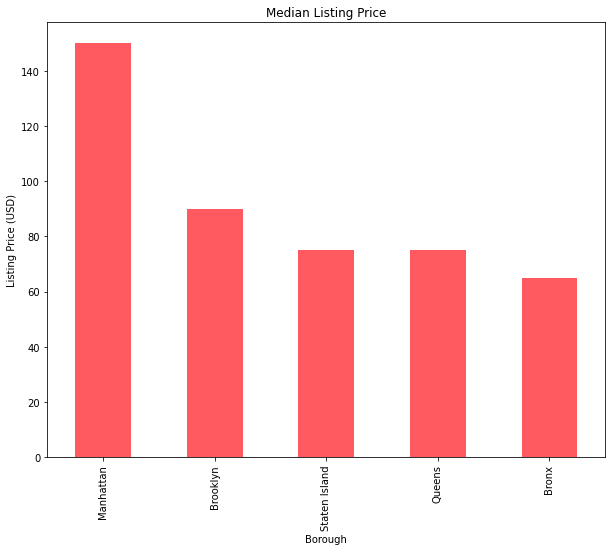

In [ ]:
#Plotting median listing price
median_listing_price.plot(kind='bar', xlabel = 'Borough', ylabel = 'Listing Price (USD)', title = "Median Listing Price", figsize=(10,8), color = '#FF5A5F')

In [ ]:
listings_boroughs = df.groupby('borough')['name'].count().sort_values(ascending = False)
listings_boroughs

borough
Manhattan        21651
Brooklyn         20089
Queens            5666
Bronx             1089
Staten Island      373
Name: name, dtype: int64

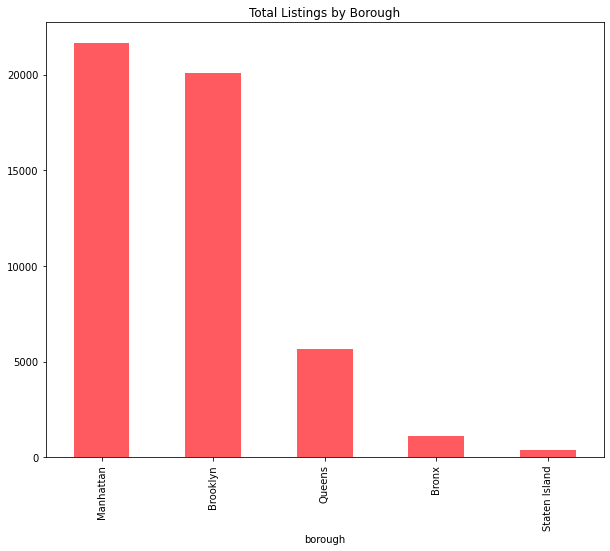

In [ ]:
listings_boroughs.plot(kind = 'bar', title = 'Total Listings by Borough',  figsize=(10,8), color = '#FF5A5F')

In [ ]:
#Median Listing Price By Room Type
median_price_room_type = df.groupby('room_type')['price'].agg('median').sort_values(ascending = False)
np.round(median_price_room_type,2)

room_type
Entire home/apt    160
Private room        70
Shared room         45
Name: price, dtype: int64

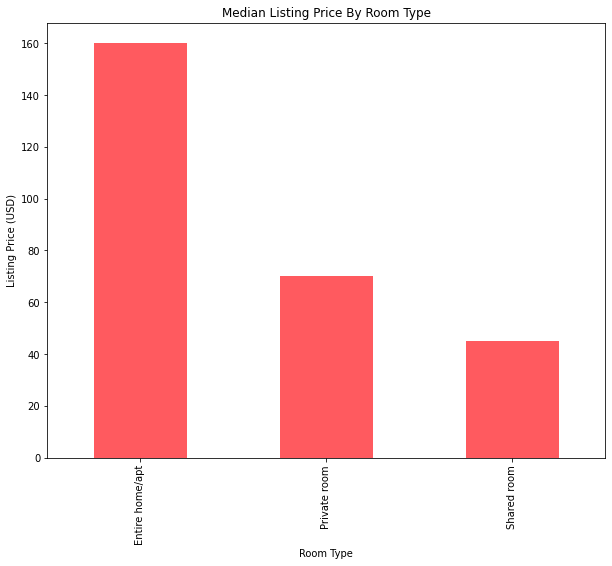

In [ ]:
#Plotting 
median_price_room_type.plot(kind = 'bar', xlabel = 'Room Type', ylabel = 'Listing Price (USD)', title = 'Median Listing Price By Room Type', figsize=(10,8), color = '#FF5A5F')

In [ ]:
top_ten_neighborhoods = df.groupby('neighborhood')['price'].agg('median').nlargest(n=10).sort_values(ascending = True)
top_ten_neighborhoods

neighborhood
Financial District    200.0
West Village          200.0
Midtown               210.0
Flatiron District     225.0
Willowbrook           249.0
NoHo                  250.0
Neponsit              274.0
Tribeca               295.0
Woodrow               700.0
Fort Wadsworth        800.0
Name: price, dtype: float64

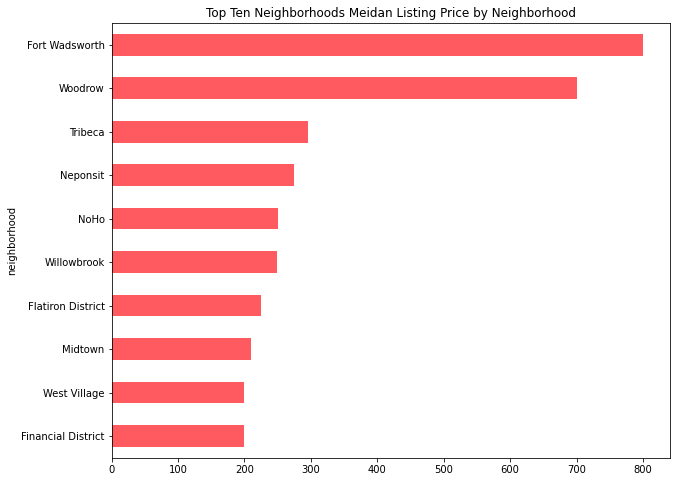

In [ ]:
top_ten_neighborhoods.plot(kind = 'barh', title = 'Top Ten Neighborhoods Meidan Listing Price by Neighborhood', figsize=(10,8), color = '#FF5A5F')

In [ ]:
bottom_ten_neighborhoods = df.groupby('neighborhood')['price'].agg('median').nsmallest(n=10).sort_values(ascending = True)
bottom_ten_neighborhoods

neighborhood
Concord           34.5
Castle Hill       39.0
Corona            40.0
Hunts Point       40.0
New Dorp Beach    40.0
Tremont           41.0
Bull's Head       45.0
Mount Eden        45.5
Soundview         49.0
Whitestone        49.0
Name: price, dtype: float64

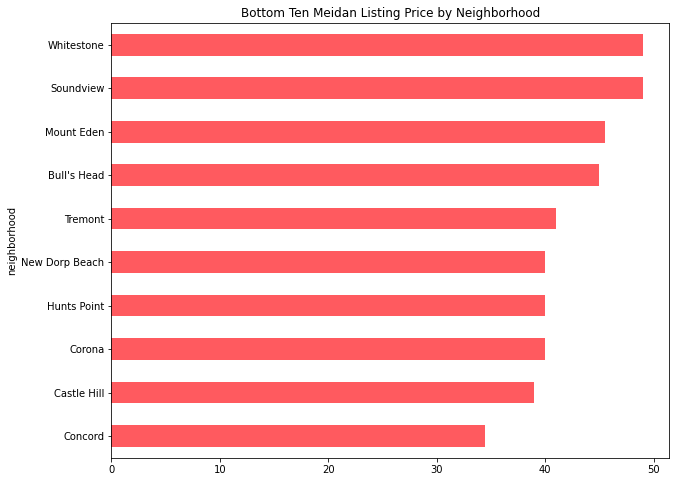

In [ ]:
bottom_ten_neighborhoods.plot(kind = 'barh', title = 'Bottom Ten Meidan Listing Price by Neighborhood', figsize=(10,8), color = '#FF5A5F')

## Geospatial visualization

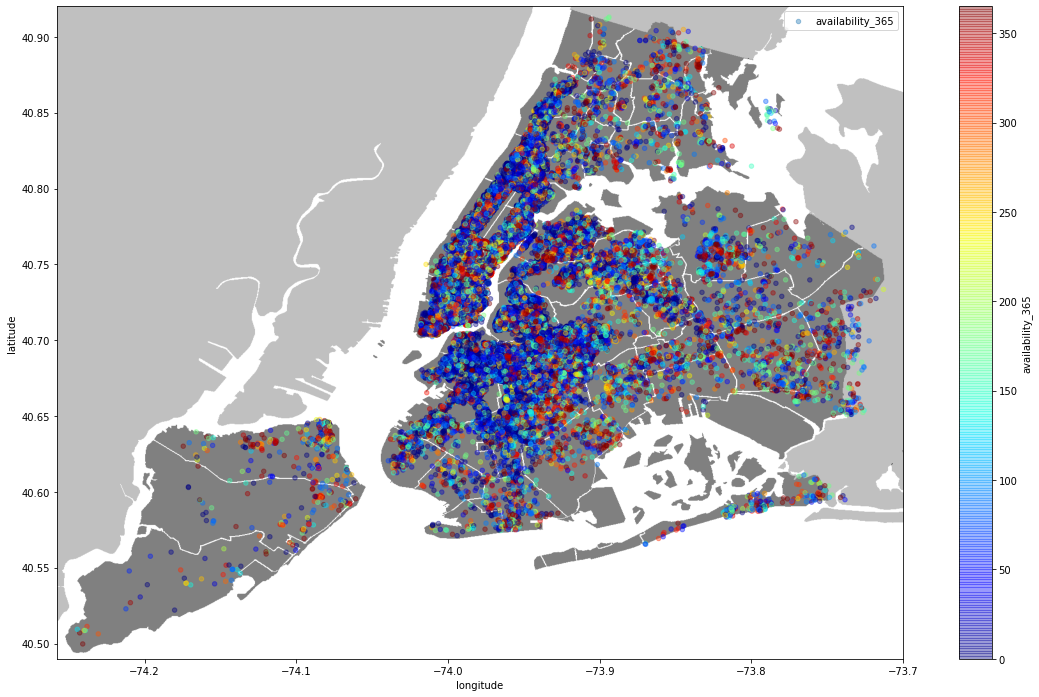

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(20,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

fig = df.plot(kind = 'scatter', x="longitude", y="latitude", label='availability_365', c = 'availability_365',
        ax = ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,12))


plt.legend()
plt.show()

In [ ]:
import sqlite3
conn = sqlite3.connect('df')
pd.read_sql('select * from df', conn)

DatabaseError: ignored